WeatherPy
----
#### Analysis
As observed in the scatter plots below, the maximum temperature of cities increases as they are located closer to the equator. Interestingly, the cities with the highest maximum temperature are between 20 to 40 degrees latitude which could be attributed to the Earth's axis tilt in relation to the sun during the month of July. This strong correlation was reflected in both hemispheres in relatively high r-values as well. 

The percentages of humidity appear to be much more clustered in a 60% and higher range as cities are located closer to the equator. However, the poor r-value suggests a weak correlation between the two variables.

Both cloudiness and wind speed displayed no relationship to latitude. This was reflected in the extremely low r-value for both variables in each hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# URL for successive API calls for various cities from the Weather Map
url = (f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}')

# Create empty list for cities
city_list = []

# Print the following as modeled in the starting code output
print('Beginning Data Retrieval')
print('--------------------------------')

# Create 'record' and 'set' counters as modeled in the starting code output
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}&q={city}')
    
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into the city_list
        city_list.append({'City': city, 
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
              
# Indicate that Data Loading is complete 
print('--------------------------------')
print('Data Retrieval Complete      ')
print('--------------------------------')        

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | lesozavodsk
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | ketchikan
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | levelland
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | amuntai
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | mansa
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hovd
Processing Record 21 of Set 1 | vila
Processing Record 22 of Set 1 | omsukchan
Processing Reco

City not found. Skipping...
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | lhokseumawe
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | coos bay
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | palmer
Processing Record 45 of Set 4 | celestun
Processing Record 46 of Set 4 | pizhma
Processing Record 47 of Set 4 | eau claire
Processing Record 48 of Set 4 | vlasim
Processing Record 49 of Set 4 | cheney
Processing Record 0 of Set 5 | barghat
Processing Record 1 of Set 5 | kuytun
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | guacimo
Processing Record 5 of Set 5 | panama city
Processing Record 6 of Set 5 | karasburg
Processing Record 7 of Set 5 | utevka
Processing Record 8 of Set 5 | magadi
Processing Record 9 of Set 5 | amapa
Processing Record 10 of Set 5 | hofn
Processin

City not found. Skipping...
Processing Record 25 of Set 8 | ciempozuelos
Processing Record 26 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 27 of Set 8 | vanavara
Processing Record 28 of Set 8 | bacolod
Processing Record 29 of Set 8 | christchurch
Processing Record 30 of Set 8 | mvuma
Processing Record 31 of Set 8 | asyut
Processing Record 32 of Set 8 | channel-port aux basques
Processing Record 33 of Set 8 | bijie
Processing Record 34 of Set 8 | coahuayana
Processing Record 35 of Set 8 | kangalassy
Processing Record 36 of Set 8 | matay
Processing Record 37 of Set 8 | vanderhoof
Processing Record 38 of Set 8 | takhtamygda
Processing Record 39 of Set 8 | antsirabe
Processing Record 40 of Set 8 | iskenderun
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | tiksi
Processing Record 43 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 44 of Set 8 | yarega
Processing Record 45 of Set 8 | ryotsu
Processing Record 46 of Set 8 | sa

Processing Record 14 of Set 12 | san policarpo
Processing Record 15 of Set 12 | kutum
Processing Record 16 of Set 12 | galle
Processing Record 17 of Set 12 | pakwach
City not found. Skipping...
Processing Record 18 of Set 12 | shuiji
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | nyagan
Processing Record 22 of Set 12 | inverell
Processing Record 23 of Set 12 | buala
Processing Record 24 of Set 12 | tsumeb
Processing Record 25 of Set 12 | jumla
Processing Record 26 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | ibra
Processing Record 29 of Set 12 | cauquenes
Processing Record 30 of Set 12 | wamba
Processing Record 31 of Set 12 | moreira sales
Processing Record 32 of Set 12 | yulara
Processing Record 33 of Set 12 | muli
Processing Record 34 of Set 12 | eskisehir
Processing Record 35 of Set 12 | senador jos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_data_df = pd.DataFrame(city_list)
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [20]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,77.00,61,20,10.29,TO,1595292455
1,punta arenas,-53.15,-70.92,30.20,92,8,6.93,CL,1595292251
2,souillac,-20.52,57.52,68.00,68,75,11.41,MU,1595292473
3,atuona,-9.80,-139.03,80.24,80,94,18.07,PF,1595292458
4,lesozavodsk,45.48,133.42,71.98,77,100,6.44,RU,1595292918


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.00000,580.000000,580.000000,580.000000,5.800000e+02
mean,21.318931,22.155690,69.00550,71.341379,49.613793,7.111862,1.595293e+09
std,33.207324,91.327945,12.92081,19.477918,41.426204,4.991360,9.337757e+01
min,-54.800000,-179.170000,28.40000,3.000000,0.000000,0.290000,1.595292e+09
25%,-6.035000,-60.977500,58.67250,59.000000,1.000000,3.360000,1.595293e+09
50%,25.455000,25.770000,70.17000,75.000000,43.000000,5.820000,1.595293e+09
75%,49.887500,103.290000,79.35000,87.000000,94.000000,9.880000,1.595293e+09
max,78.220000,179.320000,102.99000,100.000000,100.000000,27.270000,1.595293e+09


In [25]:
#  Get the indices of cities that have humidity over 100%.
extreme_humidity = city_data_df[(city_data_df['Humidity'] > 100)].index
extreme_humidity

Int64Index([], dtype='int64')

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(extreme_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,77.00,61,20,10.29,TO,1595292455
1,punta arenas,-53.15,-70.92,30.20,92,8,6.93,CL,1595292251
2,souillac,-20.52,57.52,68.00,68,75,11.41,MU,1595292473
3,atuona,-9.80,-139.03,80.24,80,94,18.07,PF,1595292458
4,lesozavodsk,45.48,133.42,71.98,77,100,6.44,RU,1595292918


In [45]:
# Extract relevant fields from the data frame
latitude = clean_city_data['Lat']
temperature = clean_city_data['Max Temp']
humidity = clean_city_data['Humidity']
cloudiness = clean_city_data['Cloudiness']
wind_speed = clean_city_data['Wind Speed']

# Export the City_Data into a csv
clean_city_data.to_csv('/Users/kiranrangaraj/Desktop/Classwork/Homework/python-api-challenge/output_data/cities.csv', index_label='City_ID')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

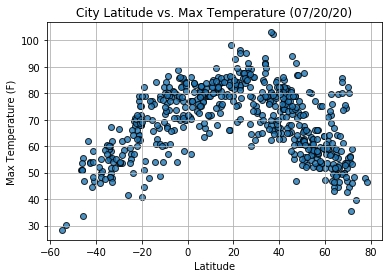

In [60]:
# Set parameters for latitude vs temperature scatter plot
plt.scatter(latitude, temperature, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the scatter plot to a PNG file
plt.savefig('/Users/kiranrangaraj/Desktop/Classwork/Homework/python-api-challenge/output_data/latitude_vs_temp.png')

# Show the scatter plot
plt.show()

#### The above code created a scatter plot comparing latitude to max temperature in Fahrenheit. Max temperature increases as the cities are located closer to the equator.

## Latitude vs. Humidity Plot

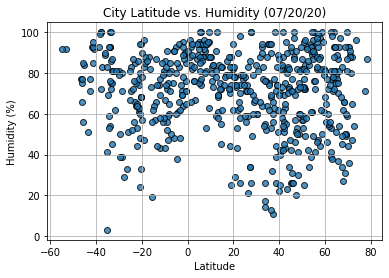

In [61]:
# Set parameters for latitude vs temperature scatter plot
plt.scatter(latitude, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the scatter plot to a PNG file
plt.savefig('/Users/kiranrangaraj/Desktop/Classwork/Homework/python-api-challenge/output_data/latitude_vs_humidity.png')

# Show the scatter plot
plt.show()

#### The above code created a scatter plot comparing latitude to percentage of humidity. Nearly all of the cities that are located close to the equator have a high percentage of humidity (> 60%).

## Latitude vs. Cloudiness Plot

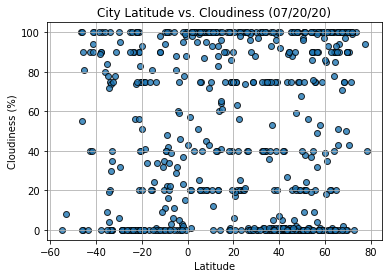

In [62]:
# Set parameters for latitude vs temperature scatter plot
plt.scatter(latitude, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the scatter plot to a PNG file
plt.savefig('/Users/kiranrangaraj/Desktop/Classwork/Homework/python-api-challenge/output_data/latitude_vs_cloudiness.png')

# Show the scatter plot
plt.show()

#### The above code created a scatter plot comparing latitude to percentage of cloudiness. There appears to be no such relationship between the two variables.

## Latitude vs. Wind Speed Plot

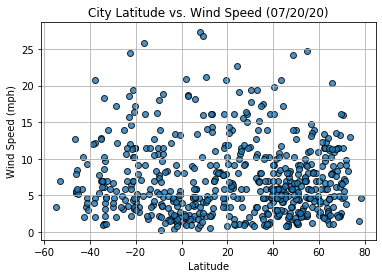

In [64]:
# Set parameters for latitude vs temperature scatter plot
plt.scatter(latitude, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the scatter plot to a PNG file
plt.savefig('/Users/kiranrangaraj/Desktop/Classwork/Homework/python-api-challenge/output_data/latitude_vs_windspeed.png')

# Show the scatter plot
plt.show()

#### The above code created a scatter plot comparing latitude to wind speed in mph. There appears to be no obvious relationship between the two variables.

## Linear Regression

In [74]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, variable, equation_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, equation_coordinates, fontsize=15, color='red')
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(variable)
    
    # Print r-squared value
    print(f'The r-squared value is: {rvalue**2}')
    
    # Show plot
    plt.show()


In [75]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[(clean_city_data['Lat'] >= 0)]
southern_df = clean_city_data.loc[(clean_city_data['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.4124881296941291


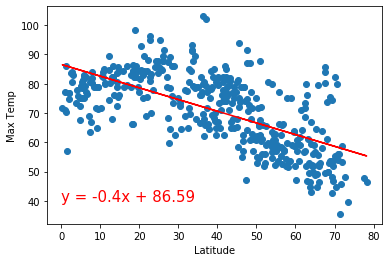

In [80]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Max Temp', (0,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5644306854084445


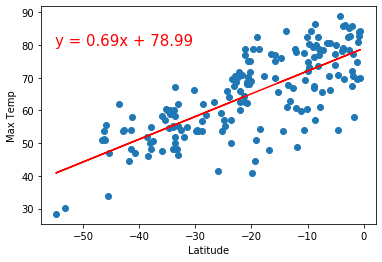

In [79]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Max Temp', (-55,80))

#### Both the Northern and Southern Hemispheres share relatively high r-values which indicates a positive correlation between max temperature and latitude. This suggests that as latitude approaches zero, max temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.01799872858227681


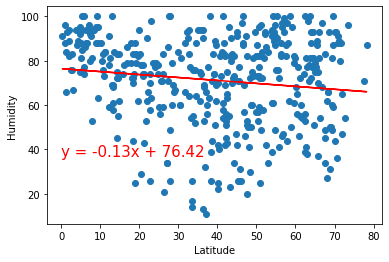

In [91]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
linear_regression_plot(x_values, y_values, 'Humidity', (0,37))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.009707537399772143


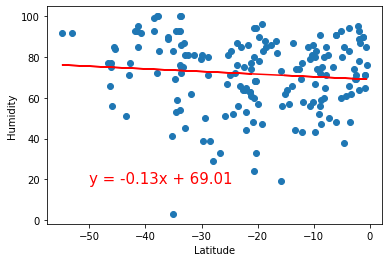

In [87]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
linear_regression_plot(x_values, y_values, 'Humidity', (-50,18))

#### Both hemispheres have weak r-values which indicates no apparent relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.006397494999017181


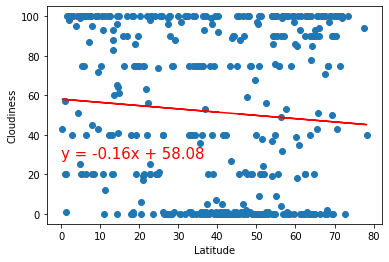

In [90]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Cloudiness', (0,28))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.008367142102539348


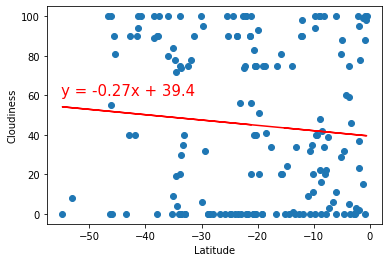

In [93]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Cloudiness', (-55,60))

#### Again, r-values for both hemispheres is extremely low indicating no relationship between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.001227974941443699


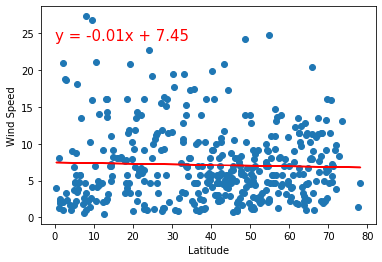

In [96]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Wind Speed', (0,24))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.007500768634731174


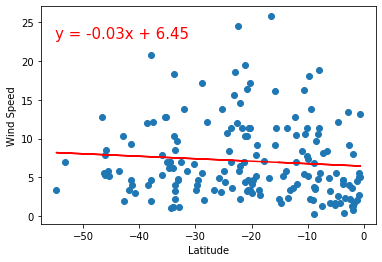

In [98]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Wind Speed', (-55,23))

#### The extremely low r-values for both hemispheres indicates no relationship between wind speed and latitude.